In [1]:
%matplotlib inline

In [2]:
import datajoint as dj
schema = dj.schema('dimitri_university')
schema.spawn_missing_classes()

Connecting dimitri@db.data-science-ust.net:3306


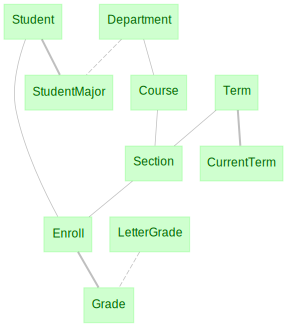

In [3]:
dj.Diagram(schema)

# Generate fake data

In [4]:
# Cleanup from previous run
Department.delete()
Student.delete()
LetterGrade.delete()
Term.delete()

About to delete:
`dimitri_university`.`enroll`: 657 items
`dimitri_university`.`section`: 2481 items
`dimitri_university`.`course`: 45 items
`dimitri_university`.`student_major`: 2235 items
`dimitri_university`.`department`: 4 items
Proceed? [yes, No]: no
Cancelled deletes.
About to delete:
`dimitri_university`.`enroll`: 657 items
`dimitri_university`.`student_major`: 2235 items
`dimitri_university`.`student`: 3000 items
Proceed? [yes, No]: no
Cancelled deletes.
About to delete:
`dimitri_university`.`letter_grade`: 11 items
Proceed? [yes, No]: no
Cancelled deletes.
About to delete:
`dimitri_university`.`current_term`: 1 items
`dimitri_university`.`enroll`: 657 items
`dimitri_university`.`section`: 2481 items
`dimitri_university`.`term`: 60 items
Proceed? [yes, No]: no
Cancelled deletes.


In [5]:
from tqdm import tqdm
import faker
import random
import itertools
import datetime
fake = faker.Faker()

## Students

In [6]:
def yield_students():
    fake_name = {'F': fake.name_female, 'M': fake.name_male}
    while True:  # ignore invalid values
        try:
            sex = random.choice(('F', 'M'))
            first_name, last_name = fake_name[sex]().split(' ')[:2]
            street_address, city = fake.address().split('\n')
            city, state = city.split(', ')
            state, zipcode = state.split(' ')            
        except ValueError:
            continue
        else:
            yield dict(
                first_name=first_name,
                last_name=last_name,
                sex=sex,
                home_address=street_address,
                home_city=city,
                home_state=state,
                home_zip=zipcode,
                date_of_birth=str(
                    fake.date_time_between(start_date="-35y", end_date="-15y").date()),
                home_phone = fake.phone_number()[:20])

In [8]:
Student.insert(
    dict(k, student_id=i) for i, k in zip(range(4000,5000), yield_students()))

In [9]:
Student()

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1000,Mary,Reyes,F,1998-11-21,1615 Durham Stream,Breannaport,NJ,15040,939-272-1996x250
1001,Martha,Hawkins,F,1998-03-07,845 Robert Shoals,Christinaville,ND,11191,188.523.0432x10178
1002,Sara,Thomas,F,1986-05-11,010 Green Trafficway,Victoriabury,SD,12769,001-395-831-6371
1003,Lauren,Green,F,1999-06-13,2315 Anderson Station Suite 105,Lake Steven,OR,25357,+1-166-678-5103x300
1004,Edward,Powell,M,2000-01-26,908 Alexandra Garden Apt. 314,Michelleland,TN,13959,735-781-6856x80717
1005,Joshua,Thompson,M,2000-02-05,4008 Steven Corners,Johnland,FL,00788,841.052.0555x9478
1006,Mark,Mason,M,2001-01-14,9471 Edwards Trace Suite 689,Huntton,NV,84711,434.469.2161x237
1007,Megan,Meyer,F,1997-11-22,683 Marie Plaza,North Chelsealand,AL,17912,+1-391-733-2757x2486
1008,Michael,Farmer,M,1993-05-06,927 Sylvia Way Suite 697,Lesterport,IN,66941,(563)547-1763x233
1009,Patricia,Russell,F,2003-05-07,20403 Dylan Fords Suite 962,North Mike,NC,24428,001-296-834-8435x190


## Departments, majors, and courses

In [ ]:
Department.insert(
    dict(dept=dept, 
         dept_name=name, 
         dept_address=fake.address(), 
         dept_phone=fake.phone_number()[:20])
    for dept, name in [
        ["CS", "Computer Science"],
        ["BIOL", "Life Sciences"],
        ["PHYS", "Physics"],
        ["MATH", "Mathematics"]])

In [ ]:
StudentMajor.insert({**s, **d, 
                     'declare_date':fake.date_between(start_date=datetime.date(1999,1,1))}
    for s, d in zip(Student.fetch('KEY'), random.choices(Department.fetch('KEY'), k=len(Student())))
                   if random.random() < 0.75)

In [ ]:
StudentMajor()

In [ ]:
# from https://www.utah.edu/
Course.insert([
    ['BIOL', 1006, 'World of Dinosaurs', 3],
    ['BIOL', 1010, 'Biology in the 21st Century', 3],
    ['BIOL', 1030, 'Human Biology', 3],
    ['BIOL', 1210, 'Principles of Biology', 4],
    ['BIOL', 2010, 'Evolution & Diversity of Life', 3],
    ['BIOL', 2020, 'Principles of Cell Biology',  3],
    ['BIOL', 2021, 'Principles of Cell Science',  4],
    ['BIOL', 2030, 'Principles of Genetics',  3],
    ['BIOL', 2210, 'Human Genetics',3],
    ['BIOL', 2325, 'Human Anatomy', 4],
    ['BIOL', 2330, 'Plants & Society', 3],
    ['BIOL', 2355, 'Field Botany', 2],
    ['BIOL', 2420, 'Human Physiology', 4],

    ['PHYS', 2040, 'Classcal Theoretical Physics II', 4],
    ['PHYS', 2060, 'Quantum Mechanics', 3],
    ['PHYS', 2100, 'General Relativity and Cosmology', 3],
    ['PHYS', 2140, 'Statistical Mechanics', 4],
    
    ['PHYS', 2210, 'Physics for Scientists and Engineers I', 4], 
    ['PHYS', 2220, 'Physics for Scientists and Engineers II', 4],
    ['PHYS', 3210, 'Physics for Scientists I (Honors)', 4],
    ['PHYS', 3220, 'Physics for Scientists II (Honors)', 4],
    
    ['MATH', 1250, 'Calculus for AP Students I', 4],
    ['MATH', 1260, 'Calculus for AP Students II', 4],
    ['MATH', 1210, 'Calculus I', 4],
    ['MATH', 1220, 'Calculus II', 4],
    ['MATH', 2210, 'Calculus III', 3],
 
    ['MATH', 2270, 'Linear Algebra', 4],
    ['MATH', 2280, 'Introduction to Differential Equations', 4],
    ['MATH', 3210, 'Foundations of Analysis I', 4],
    ['MATH', 3220, 'Foundations of Analysis II', 4],
    
    ['CS', 1030, 'Foundations of Computer Science', 3],
    ['CS', 1410, 'Introduction to Object-Oriented Programming', 4],
    ['CS', 2420, 'Introduction to Algorithms & Data Structures', 4],
    ['CS', 2100, 'Discrete Structures', 3],
    ['CS', 3500, 'Software Practice', 4],
    ['CS', 3505, 'Software Practice II', 3],
    ['CS', 3810, 'Computer Organization', 4],
    ['CS', 4400, 'Computer Systems', 4],
    ['CS', 4150, 'Algorithms', 3],
    ['CS', 3100, 'Models of Computation', 3],
    ['CS', 3200, 'Introduction to Scientific Computing', 3],
    ['CS', 4000, 'Senior Capstone Project - Design Phase', 3],
    ['CS', 4500, 'Senior Capstone Project', 3],
    ['CS', 4940, 'Undergraduate Research', 3],
    ['CS', 4970, 'Computer Science Bachelor''s Thesis', 3]])

## Terms and course sections

In [ ]:
Term.insert(dict(term_year=year, term=term) 
            for year in range(1999, 2019) 
            for term in ['Spring', 'Summer', 'Fall'])

Term().fetch(order_by=('term_year DESC', 'term DESC'), as_dict=True, limit=1)[0]

CurrentTerm().insert1({
    **Term().fetch(order_by=('term_year DESC', 'term DESC'), as_dict=True, limit=1)[0]})

def make_section(prob):
    for c in (Course * Term).proj():
        for sec in 'abcd':
            if random.random() < prob:
                break
            yield {
                **c, 'section': sec, 
                'auditorium': random.choice('ABCDEF') + str(random.randint(1,100))}   

Section.insert(make_section(0.5))

In [ ]:
Section()

In [ ]:
LetterGrade.insert([
    ['A',  4.00],
    ['A-', 3.67],
    ['B+', 3.33],
    ['B',  3.00],
    ['B-', 2.67],
    ['C+', 2.33],
    ['C',  2.00],
    ['C-', 1.67],
    ['D+', 1.33],
    ['D',  1.00],
    ['F',  0.00]])

## Enrollment and grades

In [ ]:
terms = Term().fetch('KEY')
quit_prob = 0.1
for student in tqdm(Student.fetch('KEY')):
    start_term = random.randrange(len(terms))
    for term in terms[start_term:]:
        if random.random() < quit_prob:
            break
        else:
            sections = ((Section & term) - (Course & (Enroll & student))).fetch('KEY')
            if sections:
                Enroll.insert({**student, **section} for section in 
                              random.sample(sections, random.randrange(min(5, len(sections)))))

In [10]:
Enroll()

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section
1000,BIOL,2020,2009,Summer,b
1000,BIOL,2325,2018,Summer,a
1000,BIOL,2330,2009,Summer,a
1000,CS,1410,2008,Summer,b
1000,CS,2420,2008,Spring,b
1000,CS,4150,2009,Summer,b
1000,CS,4400,2007,Fall,a
1000,CS,4970,2007,Fall,a
1000,MATH,1250,2008,Summer,c
1000,MATH,1260,2009,Spring,b


In [11]:
from matplotlib import pyplot as plt

In [12]:
q = Student.aggr(Enroll, n='count(*)').fetch('n')

In [13]:
q.min()

1

In [14]:
import numpy as np

(array([0., 1., 3., 2., 4., 1., 1., 3., 3., 2., 1., 3., 0., 0., 0., 3., 0.,
        0., 0., 0., 1., 0., 0., 0., 2., 0., 2., 0., 1., 2., 1., 1., 0., 2.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

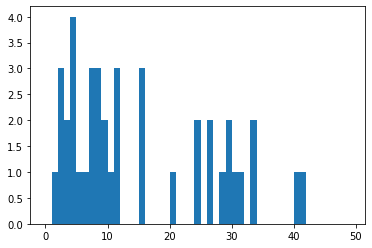

In [15]:
plt.hist(q, np.r_[:50])

(array([12., 12.,  3.,  1.,  4.,  5.,  2.,  2.,  0.,  1.]),
 array([1.0, 6.1, 11.2, 16.299999999999997, 21.4, 26.5, 31.599999999999998,
        36.699999999999996, 41.8, 46.9, 52.0], dtype=object),
 <a list of 10 Patch objects>)

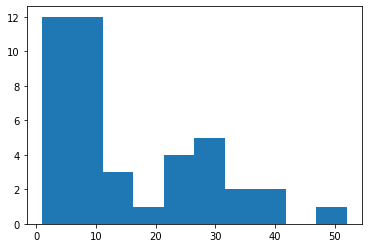

In [16]:
plt.hist(q)

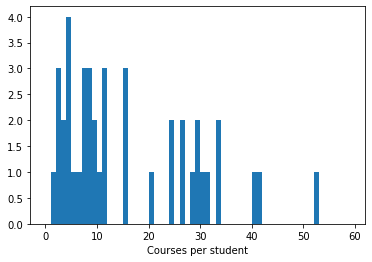

In [17]:
plt.hist(q, list(range(60)))
plt.xlabel('Courses per student');

In [18]:
# assign random grades
grades = LetterGrade.fetch('grade')

In [19]:
grade_keys = Enroll.fetch('KEY')
random.shuffle(grade_keys)
grade_keys = grade_keys[:len(grade_keys)*9//10]

In [20]:
Grade.insert({**key, 'grade':grade} 
             for key, grade in zip(grade_keys, random.choices(grades, k=len(grade_keys))))

In [22]:
Grade()

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section,grade
1000,CS,4400,2007,Fall,a,A
1001,CS,4150,2014,Spring,a,A
1001,PHYS,2210,2017,Summer,b,A
1002,BIOL,2355,2013,Summer,a,A
1002,MATH,1260,2012,Fall,d,A
1002,MATH,2210,2013,Fall,a,A
1003,BIOL,2021,2006,Fall,d,A
1003,CS,4970,2007,Spring,a,A
1005,PHYS,2140,2012,Spring,b,A
1006,PHYS,3220,2009,Spring,a,A
